# Capstone Three Project :  Alcohol Sale Forecasting

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import warnings
warnings.filterwarnings("ignore")

# 2. Loading the data

In [2]:
# import data
Alcohol = pd.read_csv('Alcohol_Sales.csv')

# 3. Data Wrangling

In [3]:
# check the first 5 rows
Alcohol.head() 

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [4]:
# check the last five rows
Alcohol.tail()

,DATE,S4248SM144NCEN
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504
324,2019-01-01,10718


In [5]:
# describe the data in statistic form
Alcohol.describe()

,S4248SM144NCEN
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


In [6]:
# check the name of the columns
Alcohol.columns

Index(['DATE', 'S4248SM144NCEN'], dtype='object')

In [7]:
# change the columns name to make it more readable
Alcohol.rename(columns={'DATE':'date', 'S4248SM144NCEN':'sold'}, inplace=True)
Alcohol.head()

,date,sold
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [8]:
# check if there are any missing values
Alcohol.isnull().sum()

date    0
sold    0
dtype: int64

In [9]:
# check if there are any duplicated data
Alcohol.duplicated().any()

False

In [10]:
# check the shape of the data
Alcohol.shape

(325, 2)

In [11]:
# check the general data information
Alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    325 non-null    object
 1   sold    325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [12]:
# sort the values by 'date'
Alcohol.sort_values(by='date')
Alcohol.head(20)

,date,sold
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
5,1992-06-01,4529
6,1992-07-01,4466
7,1992-08-01,4137
8,1992-09-01,4126
9,1992-10-01,4259


In [13]:
# check the data types
Alcohol.dtypes

date    object
sold     int64
dtype: object

In [14]:
# change the 'date' column to datetime frame
Alcohol['date']=pd.to_datetime(Alcohol['date'])

In [15]:
# check the data types again
Alcohol.dtypes

date    datetime64[ns]
sold             int64
dtype: object

In [16]:
# set the 'date' column to index
Alcohol=Alcohol.set_index('date')
Alcohol.head()

,sold
date,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [17]:
Alcohol.tail()

,sold
date,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


# 4. Exploratory Data Analysis And Visualization

<Axes: xlabel='date'>

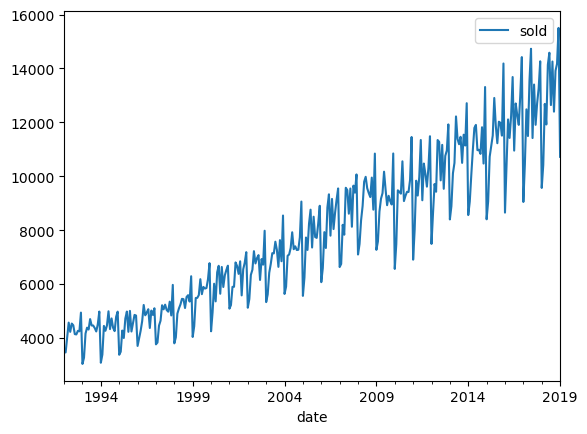

In [18]:
# visualize the data
Alcohol.plot()

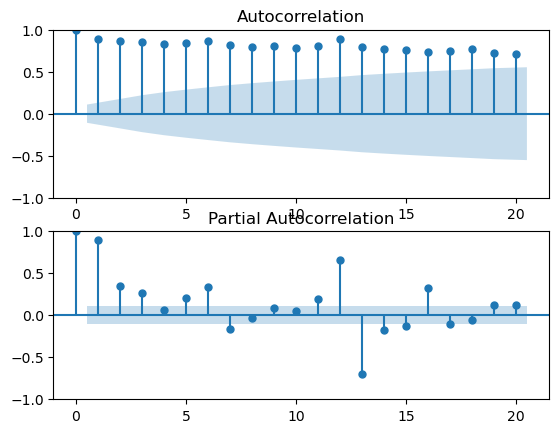

In [19]:
# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)
plot_acf(Alcohol, lags=20, ax=axes[0])
plot_pacf(Alcohol, lags=20, ax=axes[1])
plt.show()

In [20]:
# test data stationary
kpss(Alcohol)

(2.794429681699147,
 0.01,
 11,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [21]:
# use adfuller to test the stationary
adfuller(Alcohol['sold'])[1]

0.9987196267088919